In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import collections as col
import statistics
from scipy.interpolate import UnivariateSpline
import glob 
import matplotlib.patches as mpatches

In [2]:
modedatatype=([('file','i8'),('start','i8'),('end','i8'),('length','i8'),('mode','U1')])
fulldatatype=([('pulse','i8'),('frequency','i8'),('phase','i8'),('intensity','f8')])

In [3]:
file_names = glob.glob("../Parkes_archive_files/4500nsub/2019*.f256p.pdv")
file_names=sorted(file_names)

In [4]:
mode_class = np.loadtxt(fname='mode_doc_3.csv', delimiter=',', dtype=modedatatype)

In [183]:
def frequency_calc(minf,maxf,frequency_list,rfi_channels):
    frange=maxf-minf
    scrunch=max(frequency_list)+1
    wband=int((frange/scrunch)//1)
    
    true_freq=[]

    for chan in frequency_list:

        w=0
        num_chan=0
        sums=np.array([])

        while w<wband:

            try: b=rfi_channels.index(int((wband*chan)+w))
            except ValueError:
                sums=np.append(sums,int((wband*chan)+w))

            w=w+1

        centre_bin=int(np.average(sums)//1)
        print(min(sums),max(sums))
        print(centre_bin,'       ',128-len(sums),'       ',int(wband*chan+(wband/2))-1)

        centre_frequ=(centre_bin)+minf

        true_freq.append(centre_frequ)
    return true_freq

In [6]:
rfi_channels=[0,1,2,3,4,5,6,7,8,9,10,11,12,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,211,212,213,214,215,216,217,218,219,220,221,222,223,239,240,241,242,243,244,250,251,252,253,254,255,256,257,258,259,260,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,914,915,916,917,918,919,920,921,922,1024,1025,1026,1027,1028,1029,1030,1031,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1272,1273,1274,1275,1276,1277,1278,1279,1280,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983]

In [7]:
#Creating arrays for each mode, which contain the pulses for that mode
AVE=np.array([], dtype=fulldatatype)

for a in range(16):
    #Load in a file at a time
    print('File:', a)
    current_file = np.loadtxt(fname=file_names[a], dtype=fulldatatype)

    f = mode_class['file'] == a
            
    #Average
    m1 = mode_class['mode'] != 'N'
    m2 = mode_class['mode'] != 'O'
    m = np.logical_and(m1,m2)
    p = np.logical_and(f,m)
    mAVE = mode_class[p]
    
    num_AVE=np.sum(m)
    
    for segment in mAVE:
        for b in range(segment[1],segment[2]+1):
            s = current_file['pulse'] == b
            AVE = np.append(AVE,current_file[s])

File: 0
File: 1
File: 2
File: 3
File: 4
File: 5
File: 6
File: 7
File: 8
File: 9
File: 10
File: 11
File: 12
File: 13
File: 14
File: 15


In [8]:
AVE_ave=np.array([], dtype=fulldatatype)
#Averaging the modes together
for d in range(103):
    print('Frequency band:', d)
    if d in AVE['frequency']:
        e = AVE['frequency'] == d
        AVE_freq= AVE[e]
        for c in range(1024):
            ph = AVE_freq['phase'] == c
            it = AVE_freq['intensity'][ph]
    
            AVE_ave=np.append(AVE_ave,np.array((0, d, c, sum(it)/len(it)),dtype=fulldatatype))

Frequency band: 0
Frequency band: 1
Frequency band: 2
Frequency band: 3
Frequency band: 4
Frequency band: 5
Frequency band: 6
Frequency band: 7
Frequency band: 8
Frequency band: 9
Frequency band: 10
Frequency band: 11
Frequency band: 12
Frequency band: 13
Frequency band: 14
Frequency band: 15
Frequency band: 16
Frequency band: 17
Frequency band: 18
Frequency band: 19
Frequency band: 20
Frequency band: 21
Frequency band: 22
Frequency band: 23
Frequency band: 24
Frequency band: 25
Frequency band: 26
Frequency band: 27
Frequency band: 28
Frequency band: 29
Frequency band: 30
Frequency band: 31
Frequency band: 32
Frequency band: 33
Frequency band: 34
Frequency band: 35
Frequency band: 36
Frequency band: 37
Frequency band: 38
Frequency band: 39
Frequency band: 40
Frequency band: 41
Frequency band: 42
Frequency band: 43
Frequency band: 44
Frequency band: 45
Frequency band: 46
Frequency band: 47
Frequency band: 48
Frequency band: 49
Frequency band: 50
Frequency band: 51
Frequency band: 52
Fre

In [9]:
maxf=4032
minf=704
frange=maxf-minf
scrunch=max(AVE_ave['frequency'])+1
#scrunch=26
wband=int((frange/scrunch)//1)
frequency_list=list(range(0,scrunch))

In [10]:
scrunch

13

In [184]:
frequencies_rfi=frequency_calc(minf,maxf,frequency_list,rfi_channels)

13.0 249.0
127         -21         127
261.0 511.0
378         -78         383
512.0 767.0
647         -100         639
768.0 1023.0
894         -119         895
1032.0 1271.0
1155         -71         1151
1281.0 1535.0
1406         -107         1407
1536.0 1791.0
1668         -69         1663
1792.0 2047.0
1915         -110         1919
2048.0 2303.0
2175         -128         2175
2304.0 2559.0
2431         -128         2431
2560.0 2815.0
2687         -128         2687
2816.0 3071.0
2943         -128         2943
3072.0 3327.0
3199         -128         3199


In [12]:
bkk = np.loadtxt(fname='../EPN_files/B1944-129.4-LOFAR-bkk.txt', dtype=fulldatatype)
bkk2 = np.loadtxt(fname='../EPN_files/B1944-168.4-LOFAR-bkk.txt', dtype=fulldatatype)
bkk2['frequency']=1
#bkk=np.append(bkk,bkk2)
bkk_phase = max(bkk['phase']) + 1
bkk_freq = [129.4,168.4]

In [13]:
ant = np.loadtxt(fname='../EPN_files/B1944-400-gb-ant94.txt', dtype=fulldatatype)
ant2 = np.loadtxt(fname='../EPN_files/B1944-800-gb-ant94.txt', dtype=fulldatatype)
ant3 = np.loadtxt(fname='../EPN_files/B1944-1330-gb-ant94.txt', dtype=fulldatatype)
ant4 = np.loadtxt(fname='../EPN_files/B1944-1640-gb-ant94.txt', dtype=fulldatatype)
ant2['frequency']=1
ant3['frequency']=2
ant4['frequency']=3
#ant=np.append(ant,ant2)
#ant=np.append(ant,ant3)
#ant=np.append(ant,ant4)
ant_phase = max(ant['phase']) + 1
ant_freq = [400,800,1330,1640]

In [14]:
gl = np.loadtxt(fname='../EPN_files/B1944-410-Lovell-gl98.txt', dtype=fulldatatype)
gl2 = np.loadtxt(fname='../EPN_files/B1944-610-Lovell-gl98.txt', dtype=fulldatatype)
gl3 = np.loadtxt(fname='../EPN_files/B1944-925-Lovell-gl98.txt', dtype=fulldatatype)
gl4 = np.loadtxt(fname='../EPN_files/B1944-1408-Lovell-gl98.txt', dtype=fulldatatype)
gl2['frequency']=1
gl3['frequency']=2
gl4['frequency']=3
#gl=np.append(gl,gl2)
#gl=np.append(gl,gl3)
#gl=np.append(gl,gl4)
gl_phase = max(gl['phase']) + 1
gl_freq = [410,610,925,1408]

In [15]:
j = np.loadtxt(fname='../EPN_files/B1944-673.9-Parkes-j98.txt', dtype=fulldatatype)
j_phase = max(j['phase']) + 1
j_freq = [673.9]

In [16]:
wc =np.loadtxt(fname='../EPN_files/B1944-1418-Arecibo-wc.txt', dtype=fulldatatype)
wc_phase = max(wc['phase']) + 1
wc_freq = [1418]

In [17]:
sgg = np.loadtxt(fname='../EPN_files/B1944-1420-Effelsberg-sgg.txt', dtype=fulldatatype)
sgg2 = np.loadtxt(fname='../EPN_files/B1944-4750-Effelsberg-sgg.txt', dtype=fulldatatype)
sgg2['frequency']=1
#sgg=np.append(sgg,sgg2)
sgg_phase = max(sgg['phase']) + 1
sgg_freq = [1420,4750]

In [18]:
hkk = np.loadtxt(fname='../EPN_files/B1944-4850-Effelsberg-hkk.txt', dtype=fulldatatype)
hkk_phase = max(hkk['phase']) + 1
hkk_freq = [4850]

In [168]:
epn_data = [bkk,bkk2,ant, ant2, ant3, ant4, gl, gl2, gl3, gl4,j,wc,sgg,sgg2]
epn_freq = [129.4,168.4,400,800,1330,1640,410,610,925,1408,673.9,1418,1420,4750]

In [146]:
minp=375
maxp=650
minf=704
maxf=4032

In [147]:
#Defining frequency
no_freq=max(AVE_ave['frequency'])+1
size_freq=(maxf-minf)/no_freq
halfsize_freq=size_freq/2

10
40.15686274509804
10
40.15686274509804
10
80.62992125984252
10
80.62992125984252
10
80.62992125984252
10
80.62992125984252
10
22.857142857142858
10
21.28898128898129
10
20.855397148676172
10
21.28898128898129
10
80.62992125984252
10
10.009775171065494
10
2.5006105006105006
10
10.009775171065494


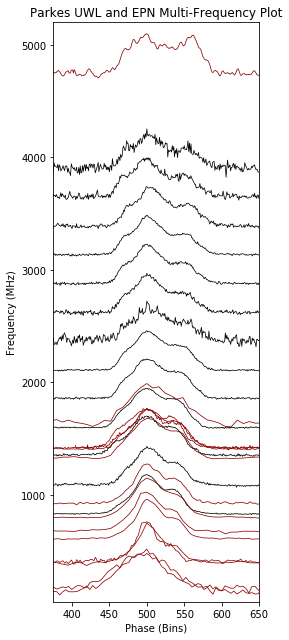

In [170]:
plt.figure(figsize=(4, 9))
#Repeating for each profile
offset=0
for freq in range(0, no_freq):
    #Selecting only one frequency profile
    f=AVE_ave['frequency'] == freq
    x=AVE_ave['phase'][f]
    #xconv=max(x)
    #x=x/xconv
    y=AVE_ave['intensity'][f]

    #Defining centre frequency
    #cf=int((freq*size_freq)+minf+halfsize_freq)
    cf=frequencies_rfi[freq]

    if len(x)!=0 and len(y)!=0:
        #Normalising y
        y=(y/max(y))*350
        #creating offset
        y=y+cf
        #offset=offset+1
        labels=str(cf)+'MHz'
        
        ym=max(y)
        ind = list(y).index(ym)
        diff=500-x[ind]
        x=np.array(x)+diff

        #plt.plot(x[int(minp):int(maxp)],y[int(minp):int(maxp)],label=labels,color='black',lw=0.75)
        plt.plot(x,y,label=labels,color='black',lw=0.75)
        #plt.text(minp+0.025,offset-0.75,labels,fontsize=6)
  
for i,epn in enumerate(epn_data):
    x=epn['phase']
    y=epn['intensity']
    
    if len(x)!=0 and len(y)!=0:
        print(x[10])
        xconv=max(x)
        x=x/xconv*1024
        print(x[10])
        y=(y/max(y))*350
        y=y+epn_freq[i]
        
        ym=max(y)
        ind = list(y).index(ym)
        diff=500-x[ind]
        x=np.array(x)+diff

        plt.plot(x,y,label=labels,color='darkred',lw=0.75)
        #plt.fill_between(x, y, facecolor='red')
        
frequencies_rfi.extend(epn_freq)

plt.axis([minp,maxp,50,5200])
plt.title('Parkes UWL and EPN Multi-Frequency Plot')
#plt.yticks(frequencies_rfi,list(frequencies_rfi))
plt.xlabel('Phase (Bins)')
plt.ylabel('Frequency (MHz)')
plt.tight_layout()
plt.savefig('multifreqUWLEPN')

In [164]:
frequencies_rfi2=frequencies_rfi.append(epn_freq)

In [23]:
for i,epn in enumerate(epn_data):
    f=epn['frequency'] == freq
    x=epn['phase'][f]
    y=epn['intensity'][f]

In [175]:
minp=550
maxp=875
minf=704
maxf=4032

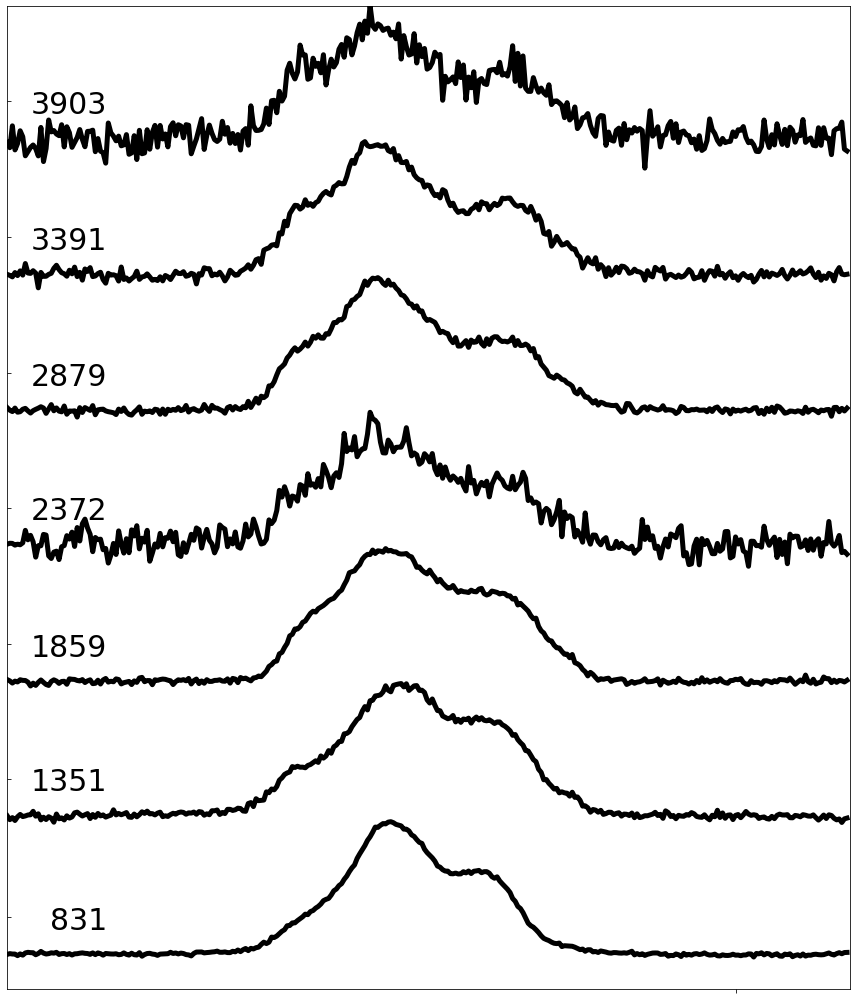

In [182]:
plt.figure(figsize=(12, 14))
#Repeating for each profile
offset=0
for freq in range(0, no_freq,2):
    #Selecting only one frequency profile
    f=AVE_ave['frequency'] == freq
    x=AVE_ave['phase'][f]
    #xconv=max(x)
    #x=x/xconv
    y=AVE_ave['intensity'][f]

    #Defining centre frequency
    #cf=int((freq*size_freq)+minf+halfsize_freq)
    cf=frequencies_rfi[freq]

    if len(x)!=0 and len(y)!=0:
        #Normalising y
        y=(y/max(y))*500
        #creating offset
        y=y+cf
        #offset=offset+1
        labels=str(cf)+'MHz'
        
        #xm=max(x)
        #ind = np.where(x==xm)
        #diff=500-x
        #x=np.array(x)+diff

        plt.plot(x[int(minp):int(maxp)],y[int(minp):int(maxp)],label=labels,color='black',lw=5)
        #plt.plot(x,y,label=labels,color='black',lw=0.75)
        #plt.text(minp+0.025,offset-0.75,labels,fontsize=6)
        

#plt.title('Parkes UWL Multi-Frequency Plot')
#plt.yticks(frequencies_rfi2)
#plt.xlabel('Phase (Bins)')
plt.xticks(list(frequencies_rfi),"")
plt.yticks(list(np.array(frequencies_rfi[::2])+140),list(frequencies_rfi[::2]))
plt.tick_params(axis="y",direction="in", pad=-100, labelsize=30)
#plt.ylabel('Frequency (MHz)')
plt.axis([550,875,700,4400])
plt.tight_layout()
plt.savefig('multifreqUWLposter3')

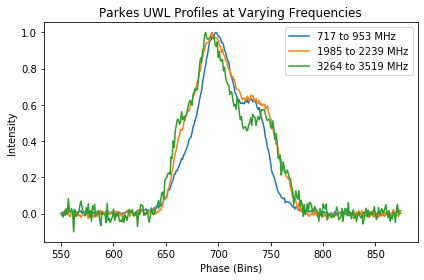

In [185]:
#plt.figure(figsize=(12, 14))
#Repeating for each profile
offset=0

labels=['717 to 953 MHz', '1985 to 2239 MHz', '3264 to 3519 MHz']

for i,freq in enumerate([0,5,10]):
    #Selecting only one frequency profile
    f=AVE_ave['frequency'] == freq
    x=AVE_ave['phase'][f]
    #xconv=max(x)
    #x=x/xconv
    y=AVE_ave['intensity'][f]

    #Defining centre frequency
    #cf=int((freq*size_freq)+minf+halfsize_freq)
    #cf=frequencies_rfi[freq]

    if len(x)!=0 and len(y)!=0:
        #Normalising y
        y=(y/max(y))
        plt.plot(x[int(minp):int(maxp)],y[int(minp):int(maxp)],label=labels[i],lw=1.5)

plt.title('Parkes UWL Profiles at Varying Frequencies')
#plt.yticks(frequencies_rfi2)
plt.xlabel('Phase (Bins)')
#plt.tick_params(axis="y",direction="in", pad=-80, labelsize=25)
plt.ylabel('Intensity')
plt.legend()
#plt.axis([550,875,700,4400])
plt.tight_layout()
plt.savefig('multifreqUWL1plot')

In [43]:
frequencies_rfi

[831, 1082, 1351, 1598, 1859, 2110, 2372, 2619, 2879, 3135, 3391, 3647, 3903]

In [111]:
labels

'3903MHz'